## Main topic: Google Search Impact on Cryptocurrencies

1. Predictions: Regression, Time Series
2. KS Test, Quarterly average -> Wald's test
3. 

### Preprocessing

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats
import utils
plt.style.use('fivethirtyeight')

In [254]:
btc_data = pd.read_csv('prices/bitcoin_dataset.csv')
btc_price = pd.read_csv('prices/bitcoin_price.csv')
trend_data = pd.read_csv('supporting datasets/googletrend.csv')

In [245]:
b = pd.read_csv('prices/bitcoin_price.csv')
b = b.drop(columns=['Volume', 'Open', 'Low', 'High', 'Market Cap'])

In [248]:
b['Date'] = pd.to_datetime(b['Date'])
b

,Date,Close
0,2018-02-20,11403.70
1,2018-02-19,11225.30
2,2018-02-18,10551.80
3,2018-02-17,11112.70
4,2018-02-16,10233.90
5,2018-02-15,10166.40
6,2018-02-14,9494.63
7,2018-02-13,8598.31
8,2018-02-12,8926.57
9,2018-02-11,8129.97


#### Convert date to datetime format

In [255]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_price['Date'] = pd.to_datetime(btc_price['Date'])
trend_data['Date'] = pd.to_datetime(trend_data['Date'])

In [256]:
btc_merged = btc_data.merge(trend_data)

In [257]:
btc_merged.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Searches
0,2013-04-28,135.98999,11090225.0,1.508160e+09,4.992244e+06,7186.0,0.126539,0.0,379.0,7.950000,...,13.958666,107554.0,40986.0,16891249.0,22796.0,22880.0,617354.607989,166226.0,22605050.0,3
1,2013-05-05,117.89001,11116975.0,1.310580e+09,1.164911e+07,7363.0,0.157518,0.0,406.0,7.800000,...,9.274902,55974.0,49419.0,17251395.0,21113.0,25215.0,613475.062548,187214.0,22070654.0,3
2,2013-05-12,114.32000,11146675.0,1.274288e+09,3.081214e+06,7570.0,0.181254,0.0,378.0,6.816667,...,7.436077,61435.0,69320.0,17683250.0,19684.0,22304.0,613817.456838,213420.0,24398195.0,3
3,2013-05-19,121.05628,11173700.0,1.352647e+09,3.417225e+06,7764.0,0.144292,0.0,340.0,8.733333,...,10.005331,51111.0,47090.0,18095649.0,19778.0,21389.0,465511.572902,115292.0,13956766.0,2
4,2013-05-26,134.04701,11201425.0,1.501518e+09,4.004847e+06,7937.0,0.132648,0.0,309.0,9.466667,...,13.630247,52307.0,39879.0,18460032.0,21292.0,21432.0,391310.153811,69529.0,9320100.0,2


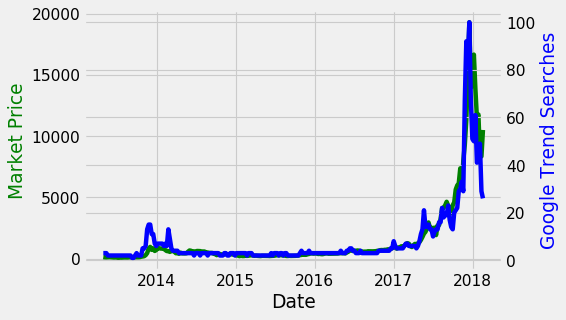

In [258]:
x = btc_merged['Date']
y1 = btc_merged['btc_market_price']
y2 = btc_merged['Searches']

fig, ax1 = plt.subplots(dpi=80)

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Market Price', color='g')
ax2.set_ylabel('Google Trend Searches', color='b')

plt.show()

### Finding correlation

In [8]:
correlation = btc_merged.corr().loc[['btc_market_price', 'Searches'], ['Searches', 'btc_market_price']]

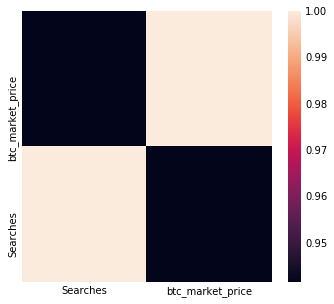

In [9]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation)

## [I] Predictions
### 1. Simple Linear Regression

In [209]:
model = LinearRegression()
searches = np.array(btc_merged['Searches']).reshape(-1,1)
btcmp = np.array(btc_merged['btc_market_price']).reshape(-1,1)
# Normalizing data
# searches = searches/max(searches)
btcmp = (1.0*btcmp/max(btcmp))*(100)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(searches, btcmp, test_size=0.33, random_state=42)

In [211]:
# model.fit(X_train, y_train)
# beta = model.coef_
beta = utils.MultipleLinearRegression(X_train, y_train)
print("beta:",beta)

('beta:', array([[1.04142485]]))


In [212]:
# model.score(X_test,y_test)
y_hat = X_test.dot(beta)

In [213]:
# y_hat = model.predict(X_test)

In [214]:
sse = utils.SSE(y_test, y_hat)
mape = utils.MAPE(y_test, y_hat)
rms = np.sqrt(mean_squared_error(y_test, y_hat))
print("sse:",sse)
print("mape:",mape)
print("rms:",rms)

('sse:', array([1448.70687195]))
('mape:', array([65.55729363]))
('rms:', 4.152891809368322)


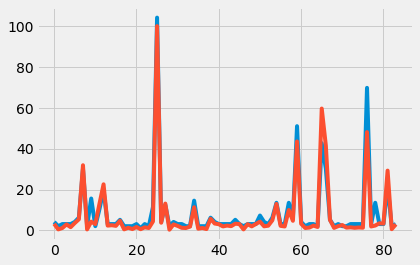

In [215]:
plt.plot(y_hat)
plt.plot(y_test)

## [II] Hypothesis Testing

### 1. KS Test

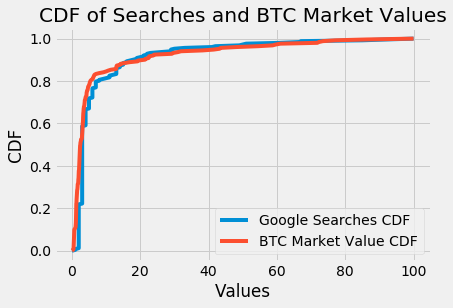

In [219]:
plt.title("CDF of Searches and BTC Market Values")
plt.xlabel("Values")
plt.ylabel("CDF")
tx, ty = utils.plot_a(searches.astype(float))
tx = np.insert(tx, 0,0)
ty = np.insert(ty, 0,0)
cdf1 = plt.plot(tx,ty, label="Google Searches CDF")
plt.legend([cdf1])

tx1, ty1 = utils.plot_a(btcmp.astype(float))
tx1 = np.insert(tx1, 0,0)
ty1 = np.insert(ty1, 0,0)
# print(tx1)
cdf2 = plt.plot(tx1,ty1, label="BTC Market Value CDF")
plt.legend()

#### Calculating $D(F_X, F_Y)$

In [218]:
stats.ks_2samp(tx,tx1)

Ks_2sampResult(statistic=0.3596837944664032, pvalue=5.7029168985656305e-15)

### Wald's Test

#### First proving asymptotically normal using monthly average

In [227]:
btc_merged

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Searches
0,2013-04-28,135.989990,11090225.0,1.508160e+09,4.992244e+06,7186.000000,0.126539,0.0,379.000000,7.950000,...,13.958666,107554.0,40986.0,16891249.0,22796.0,22880.0,6.173546e+05,166226.000000,2.260505e+07,3
1,2013-05-05,117.890010,11116975.0,1.310580e+09,1.164911e+07,7363.000000,0.157518,0.0,406.000000,7.800000,...,9.274902,55974.0,49419.0,17251395.0,21113.0,25215.0,6.134751e+05,187214.000000,2.207065e+07,3
2,2013-05-12,114.320000,11146675.0,1.274288e+09,3.081214e+06,7570.000000,0.181254,0.0,378.000000,6.816667,...,7.436077,61435.0,69320.0,17683250.0,19684.0,22304.0,6.138175e+05,213420.000000,2.439820e+07,3
3,2013-05-19,121.056280,11173700.0,1.352647e+09,3.417225e+06,7764.000000,0.144292,0.0,340.000000,8.733333,...,10.005331,51111.0,47090.0,18095649.0,19778.0,21389.0,4.655116e+05,115292.000000,1.395677e+07,2
4,2013-05-26,134.047010,11201425.0,1.501518e+09,4.004847e+06,7937.000000,0.132648,0.0,309.000000,9.466667,...,13.630247,52307.0,39879.0,18460032.0,21292.0,21432.0,3.913102e+05,69529.000000,9.320100e+06,2
5,2013-06-02,120.602930,11232900.0,1.354721e+09,1.511186e+07,8116.000000,0.122371,0.0,337.000000,6.900000,...,12.161719,50677.0,51011.0,18840653.0,22684.0,24166.0,4.374291e+05,113863.000000,1.373219e+07,2
6,2013-06-09,98.470450,11265275.0,1.109297e+09,1.928969e+07,8290.000000,0.130463,0.0,279.000000,7.666667,...,8.968122,45062.0,46237.0,19212225.0,20904.0,20537.0,6.420646e+05,230003.000000,2.264846e+07,2
7,2013-06-16,100.000000,11297375.0,1.129738e+09,1.339125e+06,8432.000000,0.098007,0.0,306.000000,6.516667,...,11.737698,37955.0,40076.0,19525289.0,17372.0,19852.0,4.586896e+05,103445.000000,1.034446e+07,2
8,2013-06-23,107.683890,11324675.0,1.219485e+09,1.807671e+06,8578.000000,0.104246,0.0,287.000000,8.716667,...,11.766414,41462.0,40634.0,19848255.0,18203.0,19398.0,3.631947e+05,103164.000000,1.110905e+07,2
9,2013-06-30,96.500000,11353150.0,1.095579e+09,1.273107e+06,8713.000000,0.093051,0.0,205.000000,8.933333,...,12.047145,41271.0,32994.0,20147470.0,19434.0,18849.0,4.219179e+05,104101.000000,1.004579e+07,2
